In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sqlalchemy import create_engine
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)
engine.dispose()

Investigate the data, and do any necessary data cleaning.

In [3]:
df.drop(['id'], axis=1, inplace=True)

In [4]:
df.garageyrblt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [5]:
## Fill continuous variable null values with zero
for column in ['masvnrarea', 'lotfrontage', 'garagecars']:
    df[column] = df[column].fillna(0)
    
indexes = df[df.garageyrblt == 'None'].index
df.loc[indexes, ['garageyrblt']] = 1980
df['garageyrblt'] = pd.to_numeric(df['garageyrblt'])

## Fill all null values with 'none'
df = df.fillna('None')

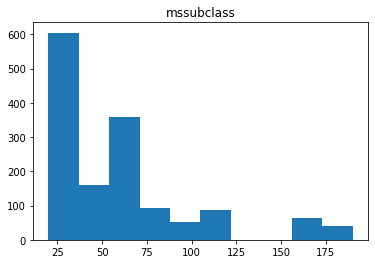

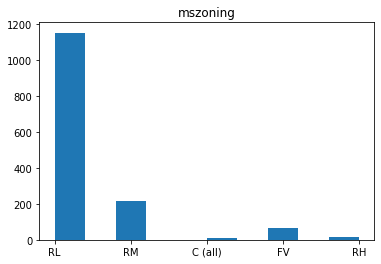

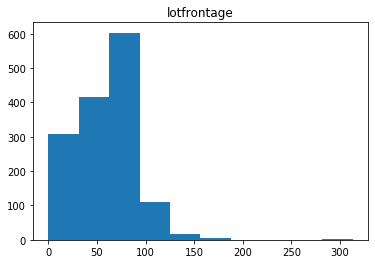

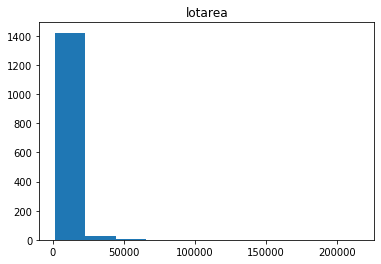

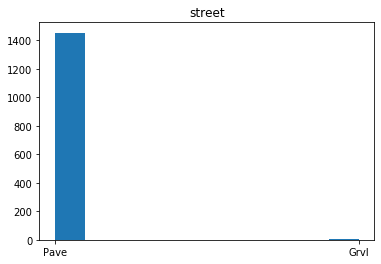

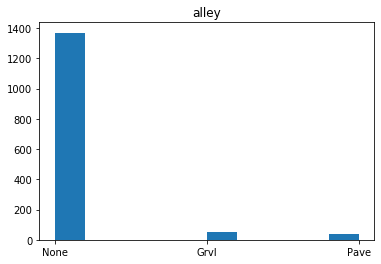

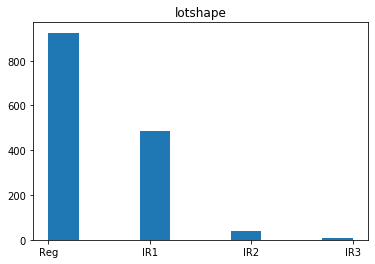

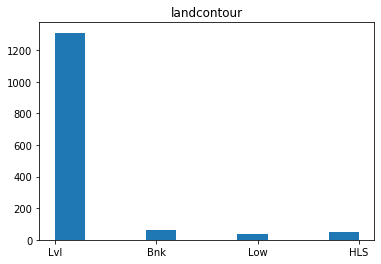

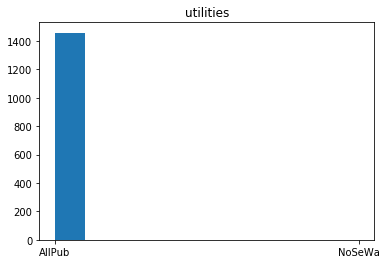

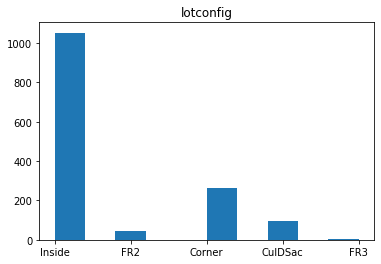

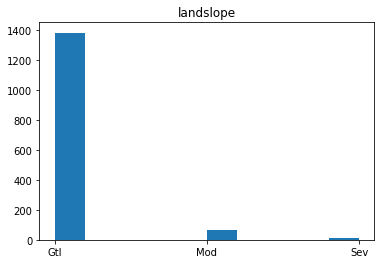

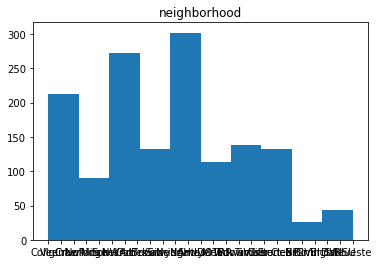

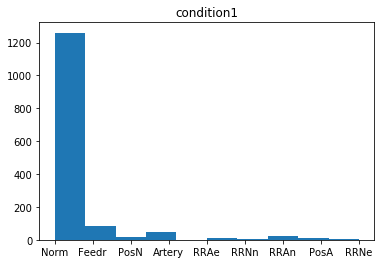

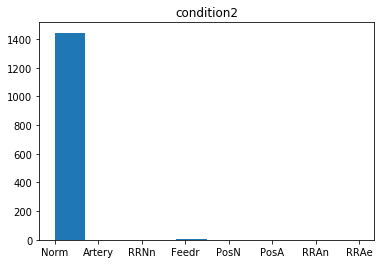

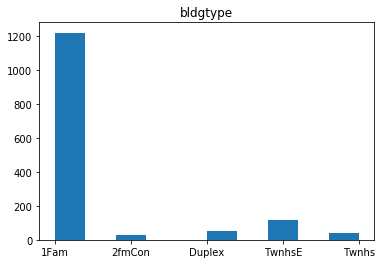

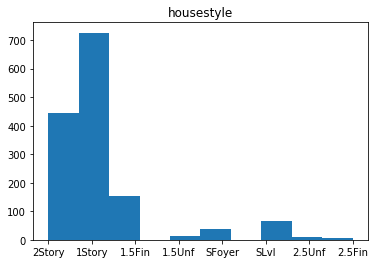

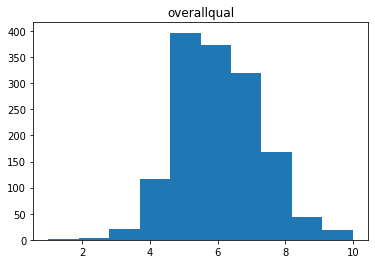

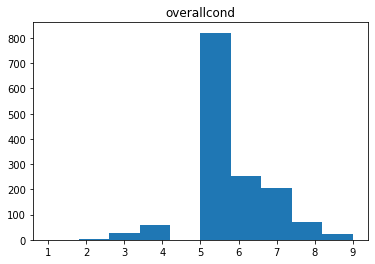

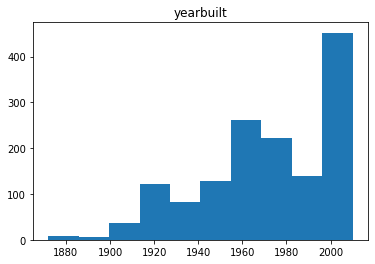

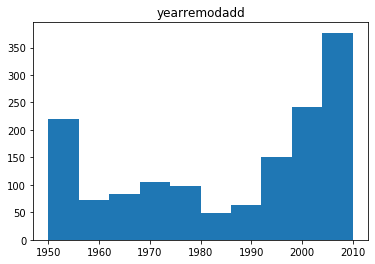

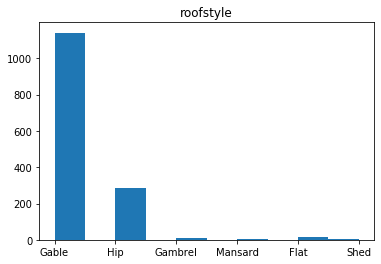

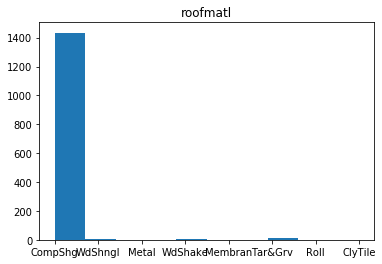

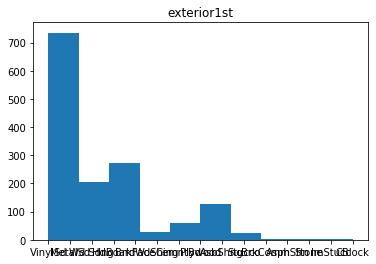

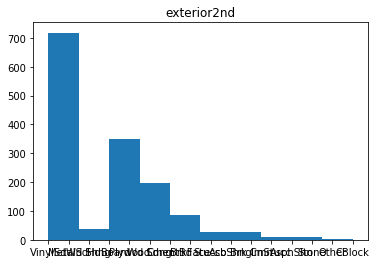

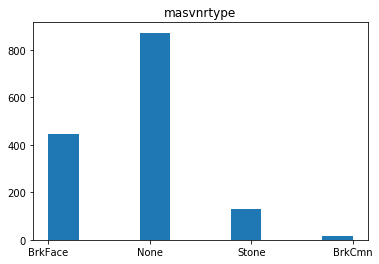

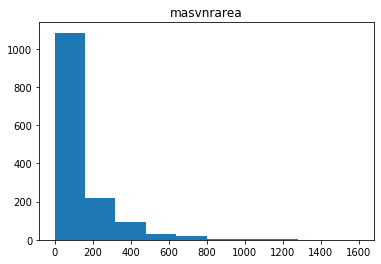

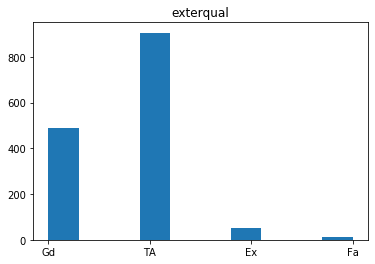

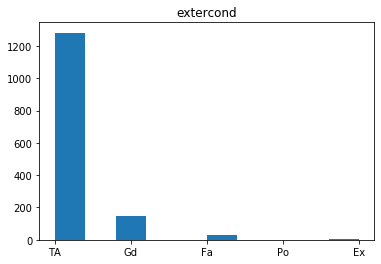

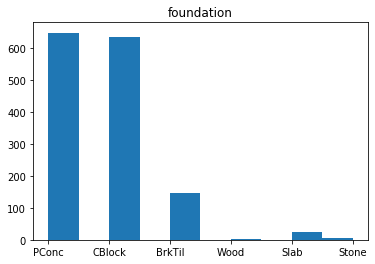

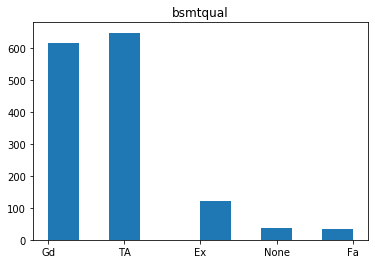

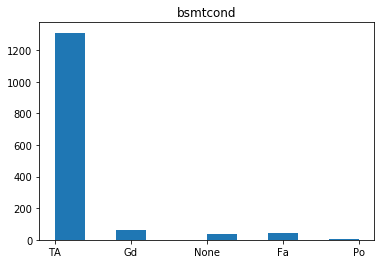

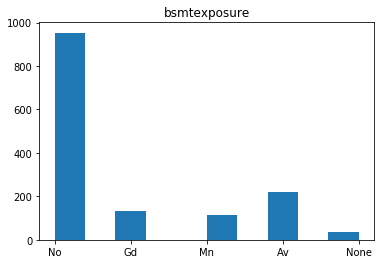

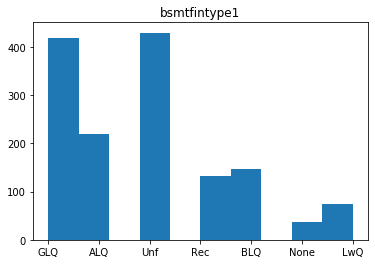

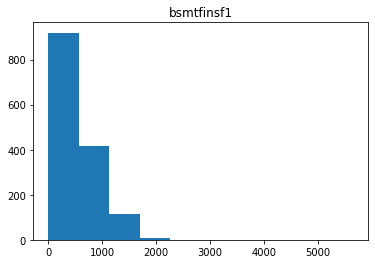

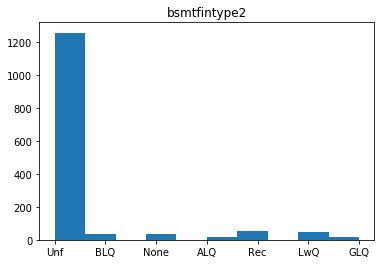

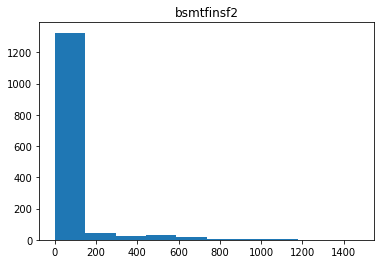

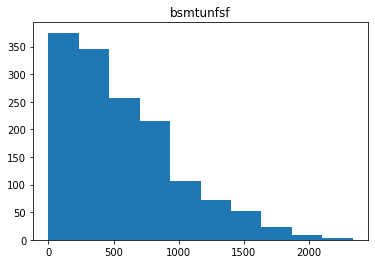

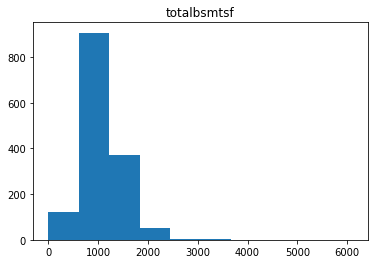

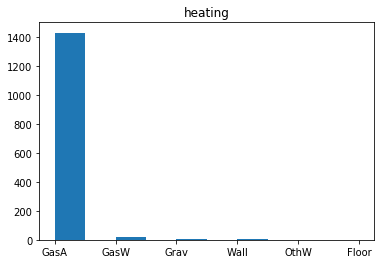

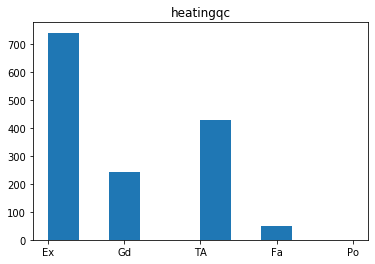

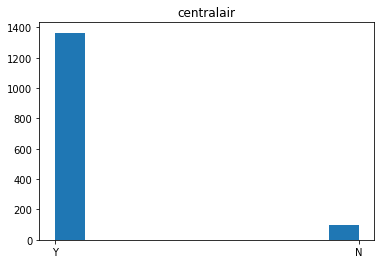

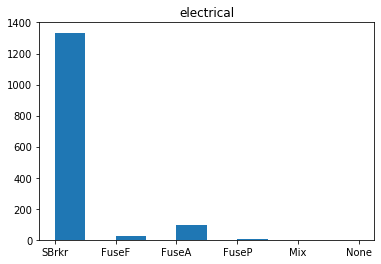

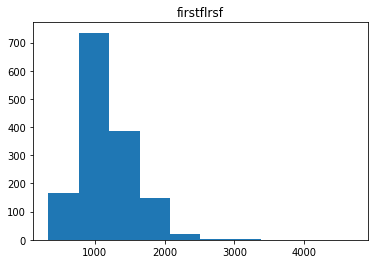

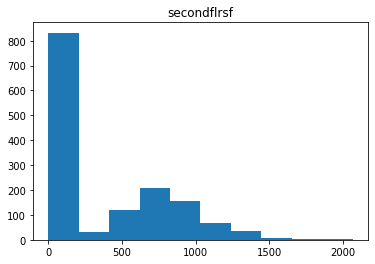

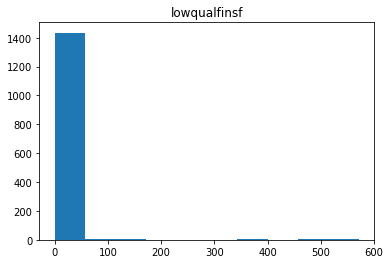

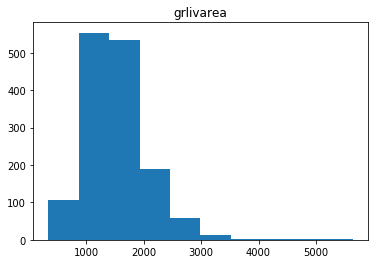

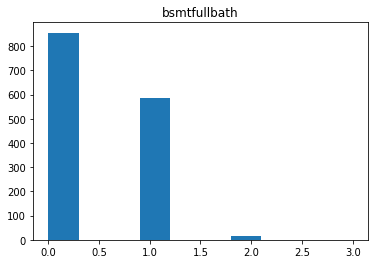

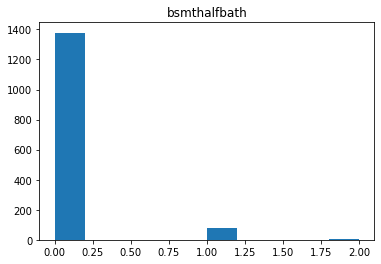

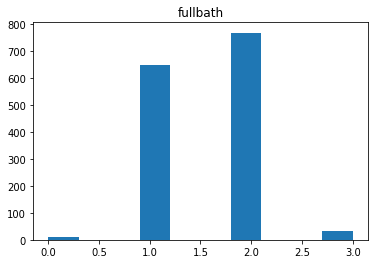

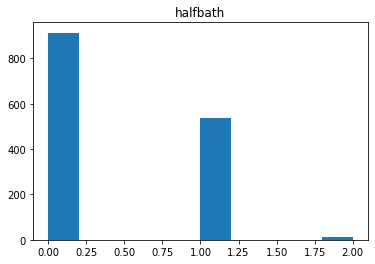

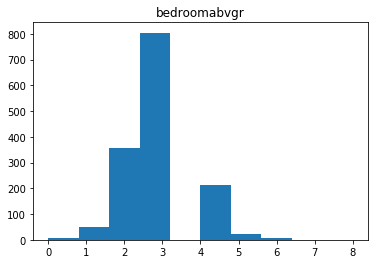

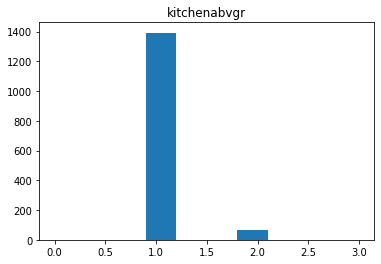

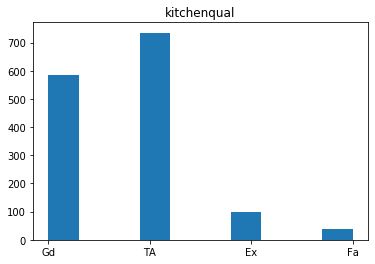

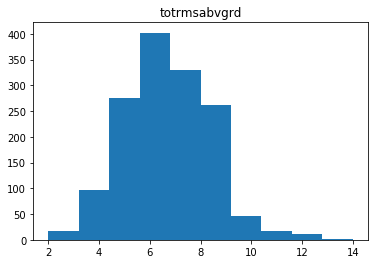

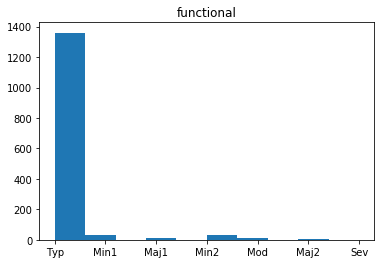

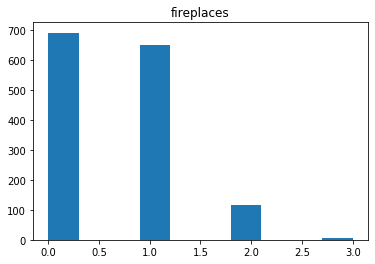

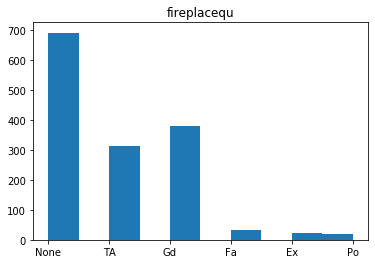

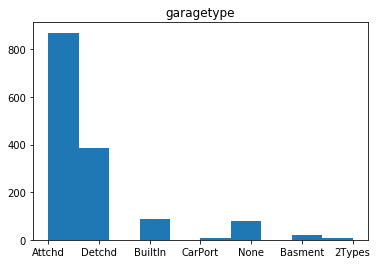

TypeError: '<=' not supported between instances of 'float' and 'str'

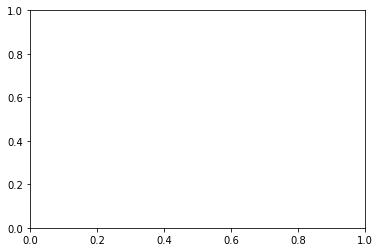

In [6]:
for column in df.columns:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

Explore the data and find some variables that you think would be useful in predicting house prices.

In [7]:
df2 = df[['overallqual', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'totrmsabvgrd',
'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'grlivarea', 'fullbath', 'saleprice']]
df2.corr()

,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,totalbsmtsf,firstflrsf,secondflrsf,grlivarea,fullbath,saleprice
overallqual,1.000000,0.572323,0.550684,0.407252,0.239666,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.537808,0.476224,0.295493,0.593007,0.550600,0.790982
yearbuilt,0.572323,1.000000,0.592855,0.311600,0.249503,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,0.391452,0.281986,0.010308,0.199010,0.468271,0.522897
yearremodadd,0.550684,0.592855,1.000000,0.176529,0.128451,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,0.291066,0.240379,0.140024,0.287389,0.439046,0.507101
masvnrarea,0.407252,0.311600,0.176529,1.000000,0.261256,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,0.360067,0.339850,0.173800,0.388052,0.272999,0.472614
bsmtfinsf1,0.239666,0.249503,0.128451,0.261256,1.000000,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,0.522396,0.445863,-0.137079,0.208171,0.058543,0.386420
totrmsabvgrd,0.427452,0.095589,0.191740,0.279568,0.044316,1.000000,0.326114,0.362289,0.337822,0.165984,0.234192,0.285573,0.409516,0.616423,0.825489,0.554784,0.533723
fireplaces,0.396765,0.147716,0.112581,0.247015,0.260011,0.326114,1.000000,0.300789,0.269141,0.200019,0.169405,0.339519,0.410531,0.194561,0.461679,0.243671,0.466929
garagecars,0.600671,0.537850,0.420622,0.361945,0.224054,0.362289,0.300789,1.000000,0.882475,0.226342,0.213569,0.434585,0.439317,0.183926,0.467247,0.469672,0.640409
garagearea,0.562022,0.478954,0.371600,0.370884,0.296970,0.337822,0.269141,0.882475,1.000000,0.224666,0.241435,0.486665,0.489782,0.138347,0.468997,0.405656,0.623431
wooddecksf,0.238923,0.224880,0.205726,0.159991,0.204306,0.165984,0.200019,0.226342,0.224666,1.000000,0.058661,0.232019,0.235459,0.092165,0.247433,0.187703,0.324413


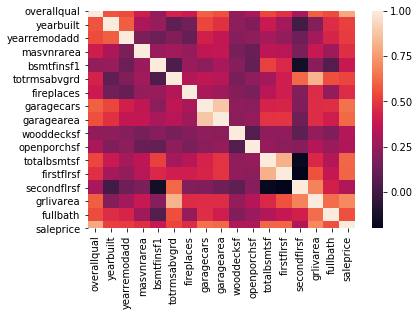

In [8]:
sns.heatmap(df2.corr())

In [9]:
df2.drop(columns = ['totrmsabvgrd', 'garageyrblt', 'garagearea', 'overallqual', 'grlivarea'], inplace=True)

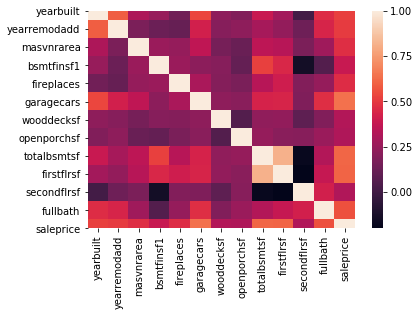

In [10]:
sns.heatmap(df2.corr())

Build your initial model using these features and estimate the parameters using OLS.

In [11]:
Y = df2.saleprice
X = df2.drop(columns = ['saleprice'])
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     368.4
Date:                Sat, 17 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:42:55   Log-Likelihood:                -17522.
No. Observations:                1460   AIC:                         3.507e+04
Df Residuals:                    1447   BIC:                         3.514e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.827e+06   1.26e+05    -14.518      0.000   -2.07e+06   -1.58e+06
yearbuilt      321.3320     52.028      6.176      0.000     219.274     423.390
yearremodadd   607.2316     65.261      9.305      0.000     479.215     735.248
masvnrarea      38.1261      6.636      5.746      0.000      25.110      51.142
bsmtfinsf1      13.4850      2.766      4.876      0.000       8.060      18.910
fireplaces    1.214e+04   1887.454      6.434      0.000    8440.829    1.58e+04
garagecars    1.788e+04   1875.061      9.535      0.000    1.42e+04    2.16e+04
wooddecksf      28.8622      8.822      3.272      0.001      11.557      46.168
openporchsf     23.8654     16.944      1.409      0.159      -9.371      57.102
totalbsmtsf     27.5601      4.544      6.065      0.000      18.646      36.474
firstflrsf      57.4029      5.511     10.415      0.000      46.592      68.214
secondflrsf     57.5155      3.362     17.108      0.000      50.921      64.110
fullbath        67.8197   2819.341      0.024      0.981   -5462.614    5598.253
==============================================================================
Omnibus:                      668.695   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90737.056
Skew:                          -1.086   Prob(JB):                         0.00
Kurtosis:                      41.560   Cond. No.                     3.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""